In [ ]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
insurance = pd.read_csv("TravelInsurancePrediction.csv")
insurance.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# EDA

In [ ]:
insurance.shape

(1987, 9)

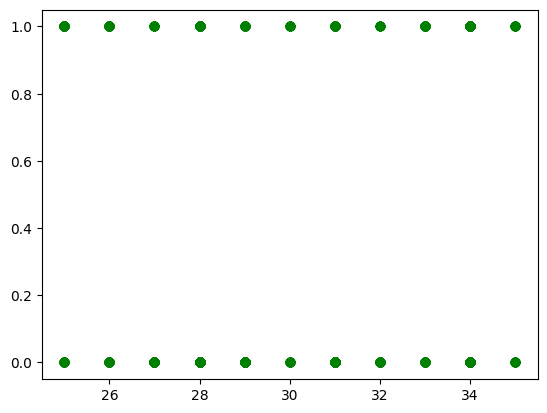

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(insurance['Age'],insurance['TravelInsurance'],color='green')

In [ ]:
insurance.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
# Changing categorical data to numerical
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [ ]:
insurance['Employment Type'] = encode.fit_transform(insurance['Employment Type'])
insurance['GraduateOrNot'] = encode.fit_transform(insurance['GraduateOrNot'])
insurance['FrequentFlyer'] = encode.fit_transform(insurance['FrequentFlyer'])
insurance['EverTravelledAbroad'] = encode.fit_transform(insurance['EverTravelledAbroad'])

In [ ]:
# checking target variable spread

insurance['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [ ]:
# Descriptive Statistics

insurance.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.713135,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Indentify Target Veriable

Y = insurance[['TravelInsurance']]
X = insurance.drop(columns=['TravelInsurance'])


In [ ]:
Y.head()

,TravelInsurance
0,0
1,0
2,1
3,0
4,0


In [ ]:
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,0,1,400000,6,1,0,0
1,31,1,1,1250000,7,0,0,0
2,34,1,1,500000,4,1,0,0
3,28,1,1,700000,3,1,0,0
4,28,1,1,700000,8,1,1,0


# Splitting the data into train and test



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)  

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test) 

(1589, 398, 1589, 398)

#Building Model for Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
blr = LogisticRegression() 

In [ ]:
model = blr.fit(x_train,y_train)
print('The model has been built successfully.')

The model has been built successfully.


# Prediction on test data

In [ ]:
y_test

,TravelInsurance
212,0
1517,1
785,0
1175,0
1760,1
...,...
1604,0
240,0
1821,1
1192,1


In [ ]:
y_test['Prediction'] = model.predict(x_test)

In [ ]:
y_test

,TravelInsurance,Prediction
212,0,0
1517,1,0
785,0,0
1175,0,0
1760,1,0
...,...,...
1604,0,0
240,0,0
1821,1,0
1192,1,0


#Random forest classifier

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
ads = pd.read_csv("TravelInsurancePrediction.csv")
ads.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


#EDA

In [ ]:
ads.shape

(1987, 9)

In [ ]:
ads.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
# Changing categorical data to numerical

from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [ ]:
ads['Employment Type'] = encode.fit_transform(ads['Employment Type'])
ads['GraduateOrNot'] = encode.fit_transform(ads['GraduateOrNot'])
ads['FrequentFlyer'] = encode.fit_transform(ads['FrequentFlyer'])
ads['EverTravelledAbroad'] = encode.fit_transform(ads['EverTravelledAbroad'])

In [ ]:
# checking target variable spread

ads['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [ ]:
# Descriptive Statistics

ads.describe()


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.713135,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Indentify Target Veriable

Y = ads[['TravelInsurance']]
X = ads.drop(columns=['TravelInsurance'])

In [ ]:
Y.head()

,TravelInsurance
0,0
1,0
2,1
3,0
4,0


In [ ]:
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,0,1,400000,6,1,0,0
1,31,1,1,1250000,7,0,0,0
2,34,1,1,500000,4,1,0,0
3,28,1,1,700000,3,1,0,0
4,28,1,1,700000,8,1,1,0


#Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(1589, 398, 1589, 398)

#Building Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)

In [ ]:
model = rf.fit(x_train,y_train)
print('The model has been built successfully!')

The model has been built successfully!


#Predicting on test data

In [ ]:
y_test

,TravelInsurance
1291,1
1199,0
1756,1
107,0
655,0
...,...
360,0
1799,1
987,1
692,0


In [ ]:
y_test['Predicted']= model.predict(x_test)

In [ ]:
y_test

,TravelInsurance,Predicted
1291,1,1
1199,0,0
1756,1,0
107,0,0
655,0,0
...,...,...
360,0,0
1799,1,1
987,1,1
692,0,0


In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(confusion_matrix(y_test['TravelInsurance'],y_test['Predicted']))

[[226  34]
 [ 50  88]]


In [ ]:
accuracy = accuracy_score(y_test['TravelInsurance'],y_test['Predicted'])
accuracy = np.round(accuracy,2)

In [ ]:
print('The accuracy of the model is:',accuracy)

The accuracy of the model is: 0.79


In [ ]:
print(classification_report(y_test['TravelInsurance'],y_test['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       260
           1       0.72      0.64      0.68       138

    accuracy                           0.79       398
   macro avg       0.77      0.75      0.76       398
weighted avg       0.79      0.79      0.79       398

